In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
if sys.version_info >= (3,8):
    import pickle
else:
    !pip install pickle5
    import pickle5 as pickle
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data - data can be found here:
# https://drive.google.com/drive/folders/1QJokFJZh1mc6PwskF3M5aWXcUzgzSQ3K?usp=sharing
os.listdir('/content/drive/My Drive/')

with open('/content/drive/My Drive/Colab_Files/emopia/featuresnp.pickle', 'rb') as f:
    featuresnp = pickle.load( f )

with open('/content/drive/My Drive/Colab_Files/emopia/domiantQsnp.pickle', 'rb') as f:
    dominantQsnp = pickle.load( f )

# outputs need to be in range starting from 0
dominantQsnp = dominantQsnp - 1

print('featuresnp.shape: ', featuresnp.shape)
print('dominantQsnp.shape: ', dominantQsnp.shape)

featuresnp.shape:  (1078, 17)
dominantQsnp.shape:  (1078,)


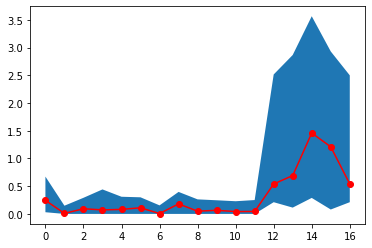

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.fill_between( np.arange( featuresnp.shape[1] ) , np.min(featuresnp, axis=0), np.max(featuresnp, axis=0) )
plt.plot( np.arange( featuresnp.shape[1] ), np.mean(featuresnp, axis=0), 'r-o' )

In [ ]:
c = featuresnp[:, 0]
print('c.shape', c.shape)
print('np.min(c)', np.min(c))
print('np.max(c)', np.max(c))
print('np.mean(c)', np.mean(c))

c.shape (1078,)
np.min(c) 0.030534351145038167
np.max(c) 0.6728624535315985
np.mean(c) 0.2440506560141825


In [ ]:
# scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False, with_std=True)
scaled_features = scaler.fit_transform( featuresnp )

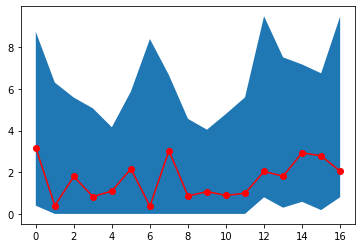

In [ ]:
plt.fill_between( np.arange( scaled_features.shape[1] ) , np.min(scaled_features, axis=0), np.max(scaled_features, axis=0) )
plt.plot( np.arange( scaled_features.shape[1] ), np.mean(scaled_features, axis=0), 'r-o' )

In [ ]:
print('dominantQsnp[:10]', dominantQsnp[:10])

happysongs = np.zeros( dominantQsnp.shape )

print('happysongs.shape', happysongs.shape)
print('dominantQsnp.shape', dominantQsnp.shape)

happysongs[ dominantQsnp == 0 or dominantQsnp == 3 ]

dominantQsnp[:10] [2 1 3 0 2 2 0 0 3 3]
happysongs.shape (1078,)
dominantQsnp.shape (1078,)


In [ ]:
x = np.array( [1,2,8,3,4,9] )
print('x:', x)

print( 'x[ 0 ] = ', x[0] )
print( 'x[ 0:3 ] = ', x[0:3] )
print( 'x[ -2: ] = ', x[-2:] )
print( 'x[ x > 5 ] = ', x[ x > 5 ] )
print( 'x[ x <= 2 || x >= 8 ] = ', x[ np.logical_or( x <= 2, x >= 8 ) ] )
print( x<=2 )
print( x>=8 )
print(np.logical_or( x <= 2, x >= 8 ))

x: [1 2 8 3 4 9]
x[ 0 ] =  1
x[ 0:3 ] =  [1 2 8]
x[ -2: ] =  [4 9]
x[ x > 5 ] =  [8 9]
x[ x <= 2 || x >= 8 ] =  [1 2 8 9]
[ True  True False False False False]
[False False  True False False  True]
[ True  True  True False False  True]
